In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time


#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing
import utils_exec_models

import numpy as np
import pandas as pd

import sklearn as sk

import matplotlib.pyplot as plt

from IPython.core.display import HTML

from IPython.display import clear_output

%matplotlib inline  

# Get the scaled Training and Validation subsets 

In [2]:
X_train, y_train, X_valid, y_valid = utils.get_train_and_validation_data(
    scaled=True,
    use_diagnosis_delay=False,
)

display(X_train.head())
display(X_valid.head())



,Sex_Male,Site_Onset,Age_at_Onset,Riluzole,FVC_at_Diagnosis,BMI_at_Diagnosis,Q1_Speech_slope_at_Diagnosis,Q2_Salivation_slope_at_Diagnosis,Q3_Swallowing_slope_at_Diagnosis,Q4_Handwriting_slope_at_Diagnosis,...,Q7_Turning_in_Bed_slope_at_Diagnosis,Q8_Walking_slope_at_Diagnosis,Q9_Climbing_Stairs_slope_at_Diagnosis,Q10_Respiratory_slope_at_Diagnosis,Qty_Regions_Involved_at_Diagnosis,Region_Involved_Bulbar_at_Diagnosis,Region_Involved_Upper_Limb_at_Diagnosis,Region_Involved_Lower_Limb_at_Diagnosis,Region_Involved_Respiratory_at_Diagnosis,Patient_with_Gastrostomy_at_Diagnosis
0,1.0,1.0,0.50,0.0,1.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.67,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.75,0.0,0.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.67,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.25,0.0,1.0,0.33,0.5,0.0,0.0,0.5,...,0.0,0.0,0.5,0.0,0.67,1.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.50,0.0,1.0,1.00,0.5,0.5,0.5,0.0,...,0.5,0.5,0.5,0.5,0.67,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.75,0.0,0.0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,1.00,1.0,1.0,1.0,1.0,0.0


,Sex_Male,Site_Onset,Age_at_Onset,Riluzole,FVC_at_Diagnosis,BMI_at_Diagnosis,Q1_Speech_slope_at_Diagnosis,Q2_Salivation_slope_at_Diagnosis,Q3_Swallowing_slope_at_Diagnosis,Q4_Handwriting_slope_at_Diagnosis,...,Q7_Turning_in_Bed_slope_at_Diagnosis,Q8_Walking_slope_at_Diagnosis,Q9_Climbing_Stairs_slope_at_Diagnosis,Q10_Respiratory_slope_at_Diagnosis,Qty_Regions_Involved_at_Diagnosis,Region_Involved_Bulbar_at_Diagnosis,Region_Involved_Upper_Limb_at_Diagnosis,Region_Involved_Lower_Limb_at_Diagnosis,Region_Involved_Respiratory_at_Diagnosis,Patient_with_Gastrostomy_at_Diagnosis
0,1.0,1.0,0.75,1.0,0.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.67,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.25,0.0,1.0,0.33,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.75,0.0,1.0,0.67,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.00,1.0,1.0,1.0,1.0,0.0
3,0.0,1.0,0.25,0.0,1.0,1.00,0.5,0.0,0.0,0.0,...,0.0,0.0,0.5,0.5,1.00,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,0.50,0.0,0.0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0


# Train the Models using GridSearch using the inputs and outputs created in the previous step

Fitting 5 folds for each of 3 candidates, totalling 15 fits
AUC Precision-Recall: 0.49519406087976814
gmeans 0.7872340425531915 0.3557692307692308
euclid 0.5957446808510638 0.45901639344262296


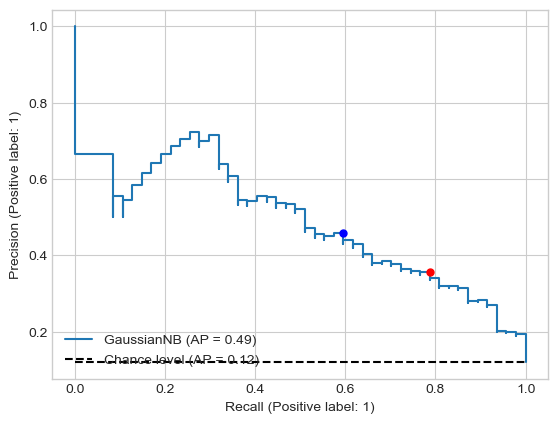

AUC ROC: 0.8754368753449016
gmeans 0.8723404255319149 0.25936599423631124
gmeans 0.8085106382978723 0.2132564841498559


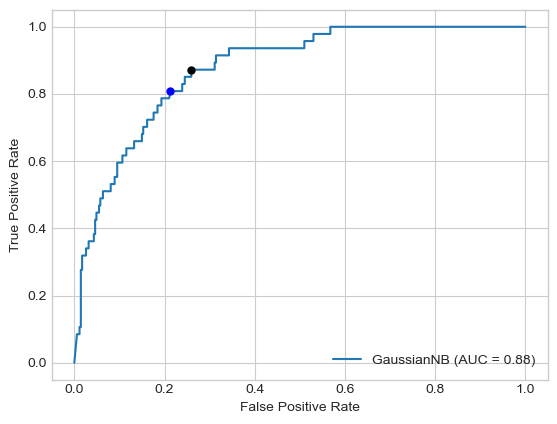

Fitting 5 folds for each of 4 candidates, totalling 20 fits
AUC Precision-Recall: 0.5850260774953858
gmeans 0.851063829787234 0.38461538461538464
euclid 0.7446808510638298 0.43209876543209874


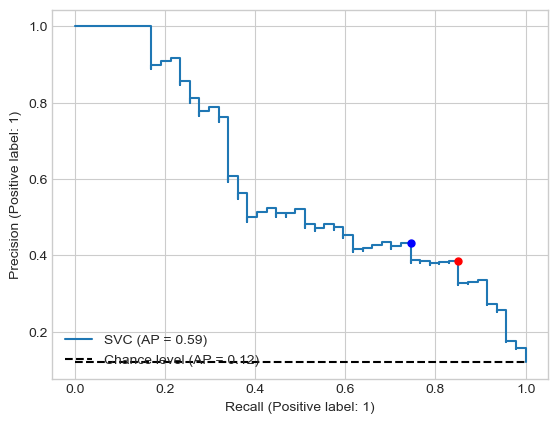

AUC ROC: 0.8860445152983015
gmeans 0.851063829787234 0.1844380403458213
gmeans 0.851063829787234 0.1844380403458213


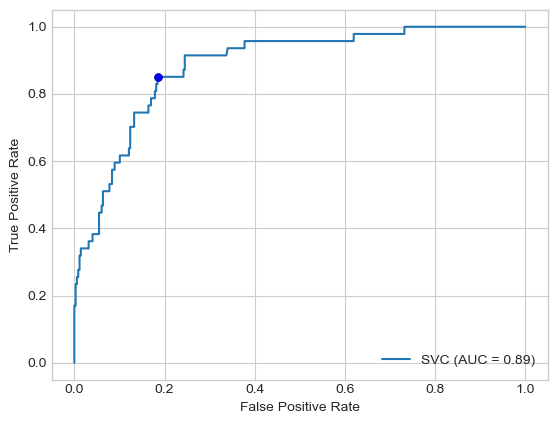


FINISHED !!!


,Dataset,Features,Model,BalAcc,Sens,Spec,f1,AUC,Acc,Prec,Classifier,Hyperparams
0,Single-Model,All Features,SVM,0.82,0.85,0.78,0.49,0.89,0.79,0.35,SVC,"C=0.3,class_weight='balanced',gamma='auto',pro..."
0,Single-Model,All Features,Naïve Bayes,0.77,0.70,0.84,0.49,0.88,0.82,0.37,GaussianNB,


2 samples were saved
CPU times: user 1.99 s, sys: 133 ms, total: 2.12 s
Wall time: 8.6 s


In [208]:
%%time

csv_results_saved = os.path.abspath('exec_results/results_Single_Model.csv')


i = 1


# verify if already exists an CSV with the results
overwrite_results_saved_previously = True

if os.path.exists(csv_results_saved) and overwrite_results_saved_previously==False:
    print('Reading results saved previously...')
    df_results = utils.read_csv(csv_file=csv_results_saved)
else:
    df_results = None


kfold = utils_exec_models.get_kfold_splits()


## define the models and hyperparameters for the GridSearch
param_grid = []

TESTING = True
# TESTING = False

# utils_exec_models.create_models_SVM_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_NB_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_DT_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_kNN_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_RF_grid(param_grid, testing=TESTING)
# utils_exec_models.create_models_NN_grid(qty_features=X_train.shape[1],  param_grid=param_grid, testing=TESTING)

#display(param_grid)

params_grid = [
    utils_exec_models.create_models_NB_grid(testing=TESTING),
    utils_exec_models.create_models_SVM_grid(testing=TESTING),
#     utils_exec_models.create_models_DT_grid(testing=TESTING),
#     utils_exec_models.create_models_kNN_grid(testing=TESTING),
#     utils_exec_models.create_models_RF_grid(testing=TESTING),
#     utils_exec_models.create_models_NN_grid(qty_features=X_train.shape[1], testing=TESTING),

]

# print(params_grid)

for param_grid in params_grid:
    if len(param_grid) > 0:

        ## execute GridSearch
        grid, df_results_aux = utils_exec_models.exec_grid_search(
            param_grid=param_grid, 
            X=X_train, 
            y=y_train,
            cv=kfold,
            verbose=1,
            return_train_score=False,
            sort_results=False,
            dataset_info='Single-Model',
            features_info='All Features',
            #
            n_jobs=8, 
            X_valid=X_valid,
            y_valid=y_valid.values.ravel(),
            plot_roc_curve=True,
            refit='AUC',
        )

    #     display(grid.cv_results_)

        if df_results is None:
            df_results = df_results_aux
        else:
            df_results = pd.concat([df_results, df_results_aux])

    #     clear_output()

        time.sleep(2)

#         break
    
print()
print('FINISHED !!!')


# sort performances results and show results
df_results = utils_exec_models.sort_performances_results(df=df_results)       
display(df_results)

# save the results
utils.save_to_csv(df=df_results, csv_file=csv_results_saved)


In [179]:
display(df_results.head(5).Hyperparams.values)

array(["class_weight='balanced',max_depth=5,n_estimators=50,random_state=42"],
      dtype=object)

AUC: 0.82


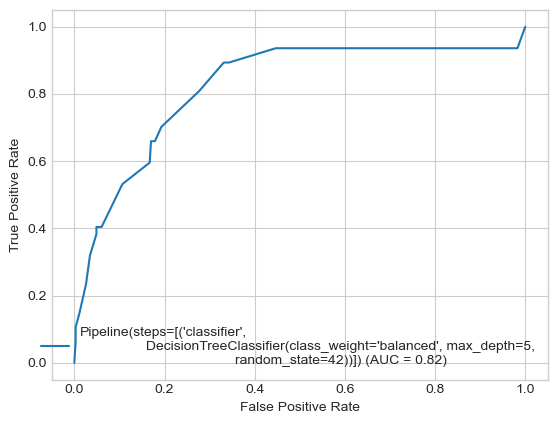

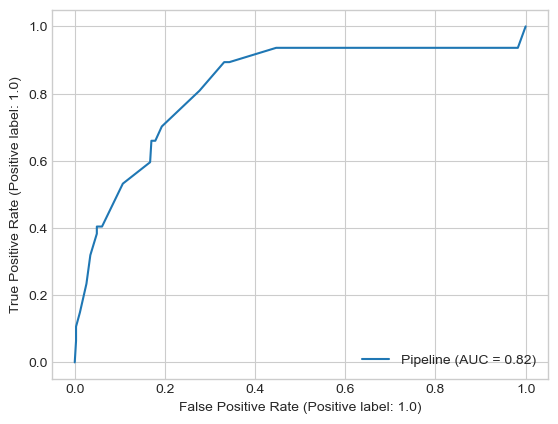

In [37]:
clf = grid.best_estimator_  

# the first column represents the probability of the negative class (class 0) and the second column represents the probability of the positive class (class 1).
y_pred = clf.predict_proba(X_valid)

y_pred_class_short_surv = y_pred[:,1]

auc = np.round(sk.metrics.roc_auc_score(y_valid, y_pred_class_short_surv), 2)
print(f'AUC: {auc}')
# print(y_pred_class_1)

fpr, tpr, thresholds = sk.metrics.roc_curve(
    y_valid, 
    y_pred_class_short_surv,
    drop_intermediate=False
)


estimator_name = str(clf)

roc_auc = sk.metrics.auc(fpr, tpr)
roc_display = sk.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=estimator_name)
roc_display.plot()
plt.show()



roc_display = sk.metrics.RocCurveDisplay.from_estimator(
    estimator=clf, 
    X=X_valid, 
    y=y_valid,
    response_method='predict_proba',
)
plt.show()

# print(
#     get_scores_from_predict_proba(
#         y_validation=y_valid, 
#         # y_pred=None, 
#         fitted_model=clf, 
#         X_validation=X_valid, 
#     )
# )    


# clf.fit(X_train, y_train)  
# roc_display = sk.metrics.RocCurveDisplay.from_estimator(
#     estimator=grid, 
#     X=X_valid, 
#     y=y_valid,
#     response_method='predict_proba',
# )
# plt.show()

# print(roc_display)

# print(
#     get_scores_from_predict_proba(
#         y_validation=y_valid, 
#         # y_pred=None, 
#         fitted_model=clf, 
#         X_validation=X_valid, 
#     )
# )    




# pred = clf.predict_proba(X_valid)

# print(pred)
# print(y_valid)

# print('DSDSF SF')




Best Threshold=0.442578, G-Mean=0.773
0.3314121037463977 0.8936170212765957


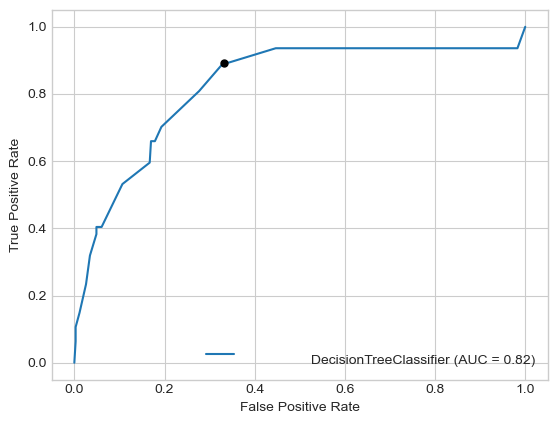

In [57]:
fpr, tpr, thresholds = sk.metrics.roc_curve(y_valid, y_pred_class_short_surv)
estimator_name = str(clf).split(',')[1].split('(')[0]
roc_auc = sk.metrics.auc(fpr, tpr)
roc_display = sk.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=estimator_name)
roc_display.plot()

gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print(fpr[ix], tpr[ix])
plt.plot(fpr[ix], tpr[ix], 'ko', ms=5)
plt.show()


In [39]:
# init a dataframe for results
df_test = pd.DataFrame({
#     "x": X_valid.values.flatten(),
    "y": y_valid.values.flatten(),
    "proba": y_pred_class_short_surv
})

display(df_test)


# sort it by predicted probabilities
# because thresholds[1:] = y_proba[::-1]
df_test.sort_values(by="proba", inplace=True)
# add reversed TPR and FPR
df_test["tpr"] = tpr[1:][::-1]
df_test["fpr"] = fpr[1:][::-1]
# optional: add thresholds to check
#df_test["thresholds"] = thresholds[1:][::-1]
# add Youden's j index
df_test["youden_j"] = df_test.tpr - df_test.fpr
# define the cut_off and diplay it
cut_off = df_test.sort_values(
    by="youden_j", ascending=False, ignore_index=True).iloc[0]
print("CUT-OFF:")
print(cut_off)

# plot everything
with plt.style.context("bmh"):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    RocCurveDisplay(
        fpr=df_test.fpr, tpr=df_test.tpr,
        roc_auc=roc_auc).plot(ax=ax[0])
    ax[0].set_title("ROC curve")
    ax[0].axline(xy1=(0,0), slope=1, color="r", ls=":")
    ax[0].plot(cut_off.fpr, cut_off.tpr, 'ko', ms=10)
    
    df_test.plot(
        x="youden_j", y="proba", ax=ax[1], 
        ylabel="Predicted Probabilities", xlabel="Youden j",
        title="Youden's index", legend=False
    )
    ax[1].axvline(cut_off.youden_j, color="k", ls="--")
    ax[1].axhline(cut_off.proba, color="k", ls="--")
    
    df_test.plot(
        x="x", y="proba", ax=ax[2], 
        ylabel="Predicted Probabilities", xlabel="X Feature",
        title="Cut-Off", legend=False
    )
    ax[2].axvline(cut_off.x, color="k", ls="--")
    ax[2].axhline(cut_off.proba, color="k", ls="--")

    plt.show()

,y,proba
0,0.0,0.125561
1,0.0,0.508110
2,0.0,0.442578
3,0.0,0.508110
4,0.0,0.084758
...,...,...
389,0.0,0.084758
390,0.0,0.442578
391,0.0,0.125561
392,0.0,0.442578


ValueError: Length of values (21) does not match length of index (394)

In [40]:
tpr

array([0.        , 0.06382979, 0.10638298, 0.14893617, 0.23404255,
       0.31914894, 0.38297872, 0.40425532, 0.40425532, 0.53191489,
       0.59574468, 0.65957447, 0.65957447, 0.70212766, 0.80851064,
       0.89361702, 0.89361702, 0.93617021, 0.93617021, 0.93617021,
       0.93617021, 1.        ])

---
---
---
# OTHERS

## Test create a classifier using the  model + hyperparams from the results

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC


df_results = utils.read_csv(csv_file=csv_results_saved)

dd = list()

for index, row in df_results.iterrows():
    dd.append([row.Classifier, row.Hyperparams])


for m, h in dd:

    model = utils_exec_models.create_model_from_string(
        model=m,
        hyperparams=h,
    )

#     model.fit(
#         X_train, 
#         y_train[utils.CLASS_COLUMN].ravel()
#     )
    
#     y_pred = model.predict(X_valid)
    
    print(model)
#     print(y_pred)
    print()
    

SVC(C=0.5, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=0.5, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=0.7, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=0.7, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=1, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=1, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=0.3, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=0.3, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SVC(C=1500, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

SVC(C=1500, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)

SV

In [ ]:
df_results

### Show other grid properties

In [ ]:
print(f'Best Bal.Acc.: {grid.best_score_:.2f}')
print(f'        Model: {grid.best_params_["classifier"]} ') 
print(f'Performance using the Validation set:  {grid.score(X_valid, y_valid):.2f}')


